In [10]:
from utils import *
import glob
import os
import pickle
from cvae import CVAE
from vae import VAE
from stn import SpatialTransformer
from sklearn.metrics import confusion_matrix
import seaborn as sns


cvae = torch.load(
    "/Users/henrywilliams/Documents/uni/amml/lab5/results/experiment-4/E4-model.pt"
)
cvae.eval()

stn = SpatialTransformer().to(device)
stn.load_state_dict(
    torch.load(
        "/Users/henrywilliams/Documents/uni/amml/lab5/src/trained-stn.pt",
        weights_only=True,
    )
)
stn.eval()
None

/var/folders/jd/lb_vbvw54zd00wp54hlkx4_m0000gn/T/ipykernel_42676/2484443216.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cvae = torch.load("/Users/henrywilliams/Docu

In [3]:
test = []
stn_test = []
train = []
stn_train = []
for img, _ in test_augment:
    test.extend(img)
    stn_test.extend(stn(img.to(device)).cpu().detach().numpy())

for img, _ in train_augment:
    train.extend(img)
    stn_train.extend(stn(img.to(device)).cpu().detach().numpy())

test = np.array(test)
stn_test = np.array(stn_test)
train = np.array(train)
stn_train = np.array(stn_train)

/Users/henrywilliams/Documents/uni/amml/lab5/.venv/lib/python3.11/site-packages/torch/nn/functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/henrywilliams/Documents/uni/amml/lab5/.venv/lib/python3.11/site-packages/torch/nn/functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [4]:
lr_model = LogisticRegression(max_iter=1000)
train_encodings, train_labels = create_encodings(cvae, train_augment, 100)
test_encodings, test_labels = create_encodings(cvae, test_augment, 100)
lr_model.fit(train_encodings, train_labels)

pred_labels = lr_model.predict(test_encodings)

/Users/henrywilliams/Documents/uni/amml/lab5/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

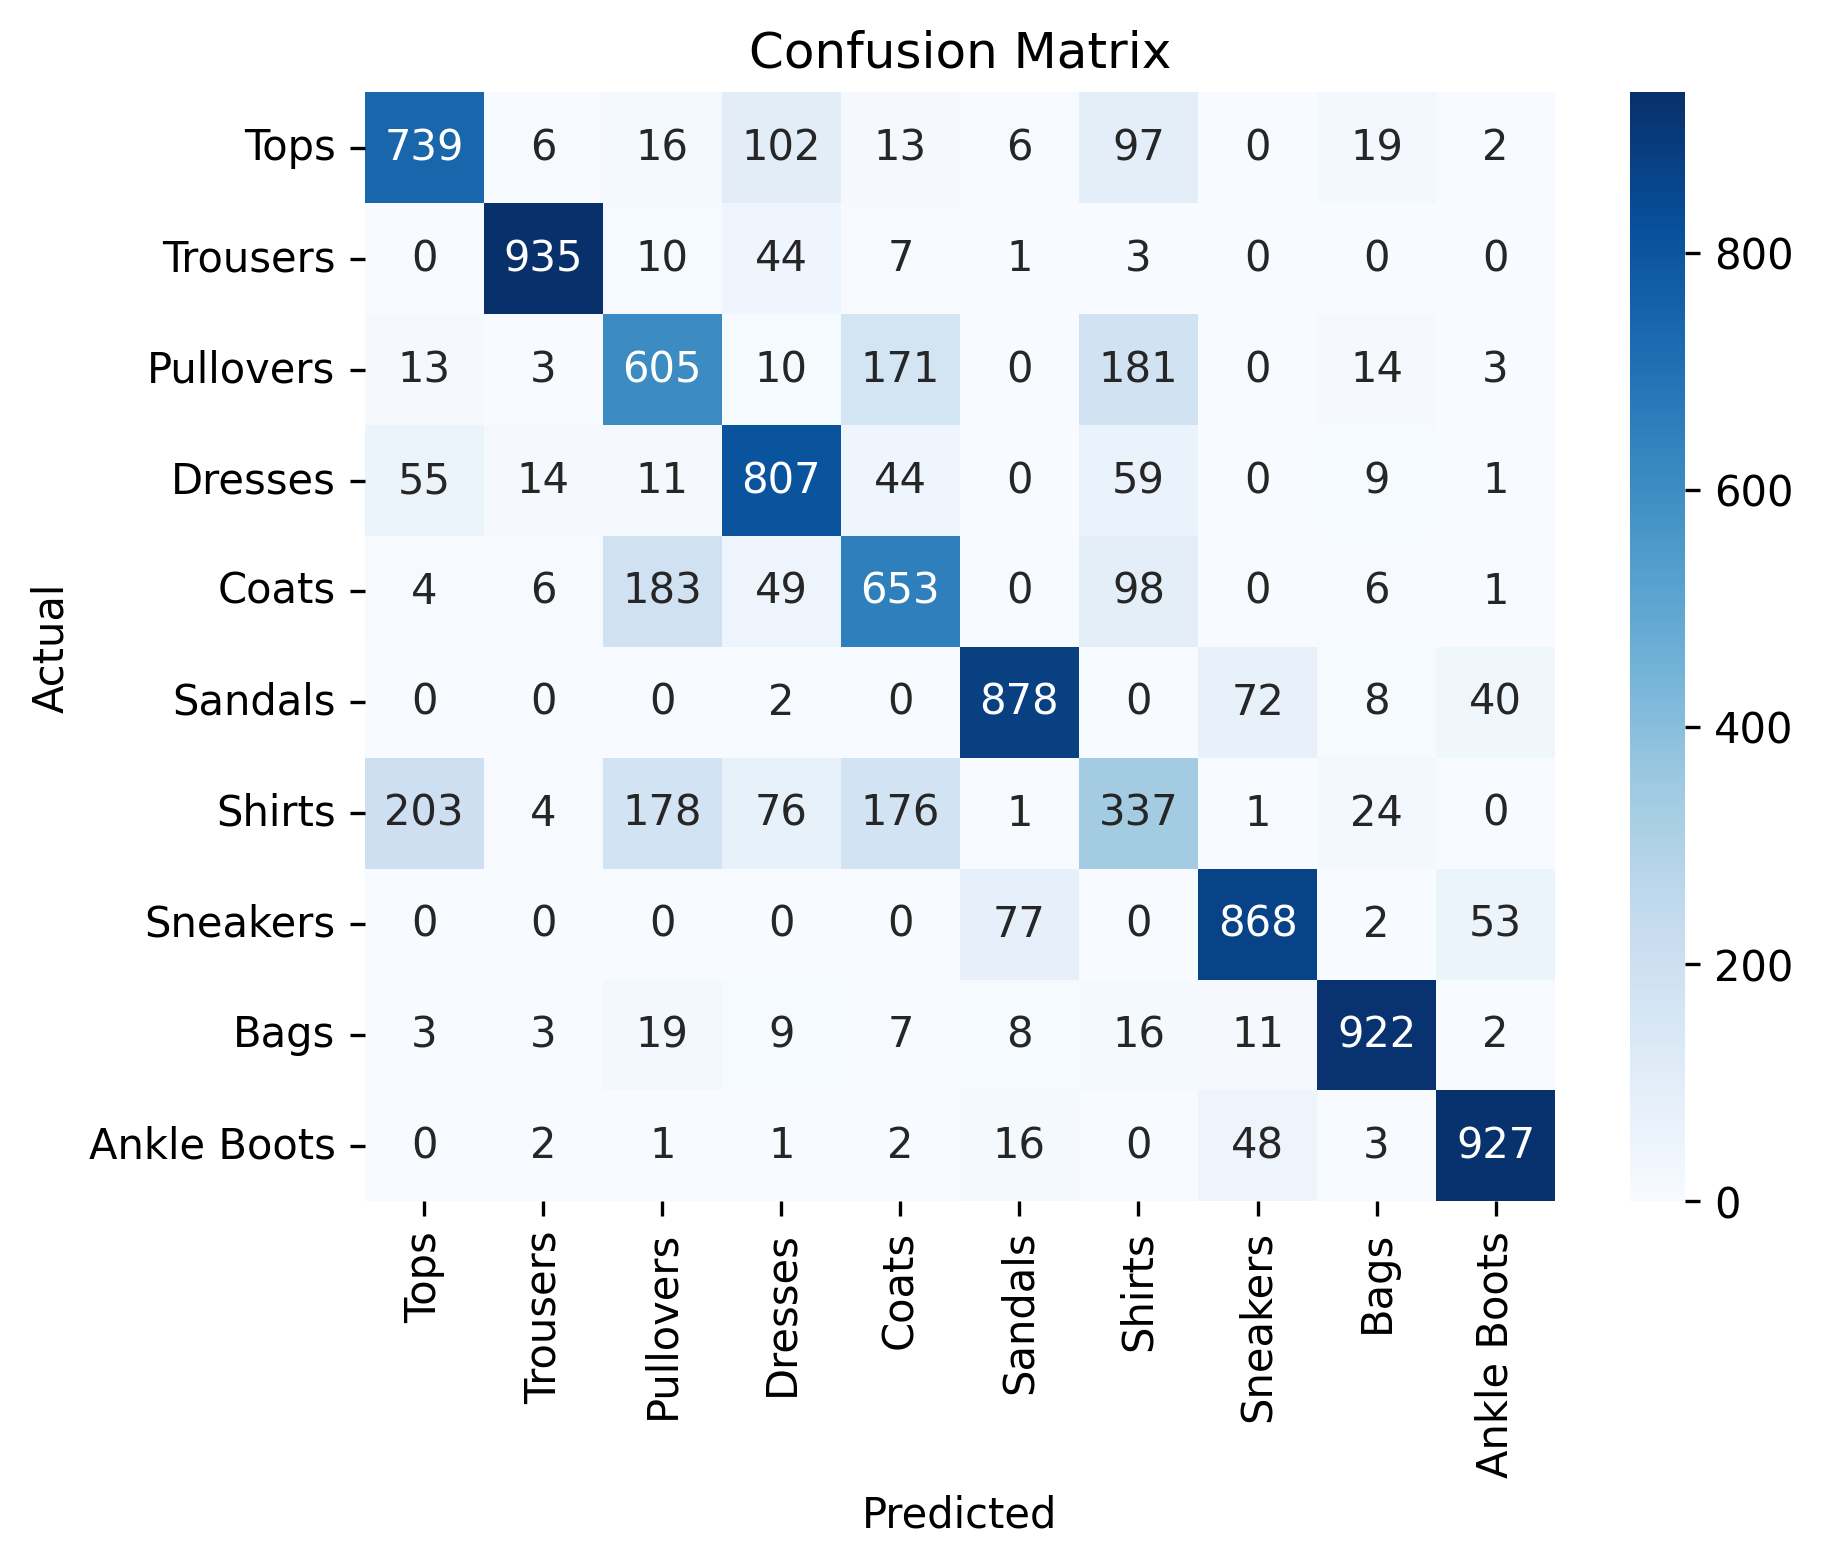

In [11]:
cm = confusion_matrix(test_labels, pred_labels)
plt.figure()
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=CLASSES, yticklabels=CLASSES
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

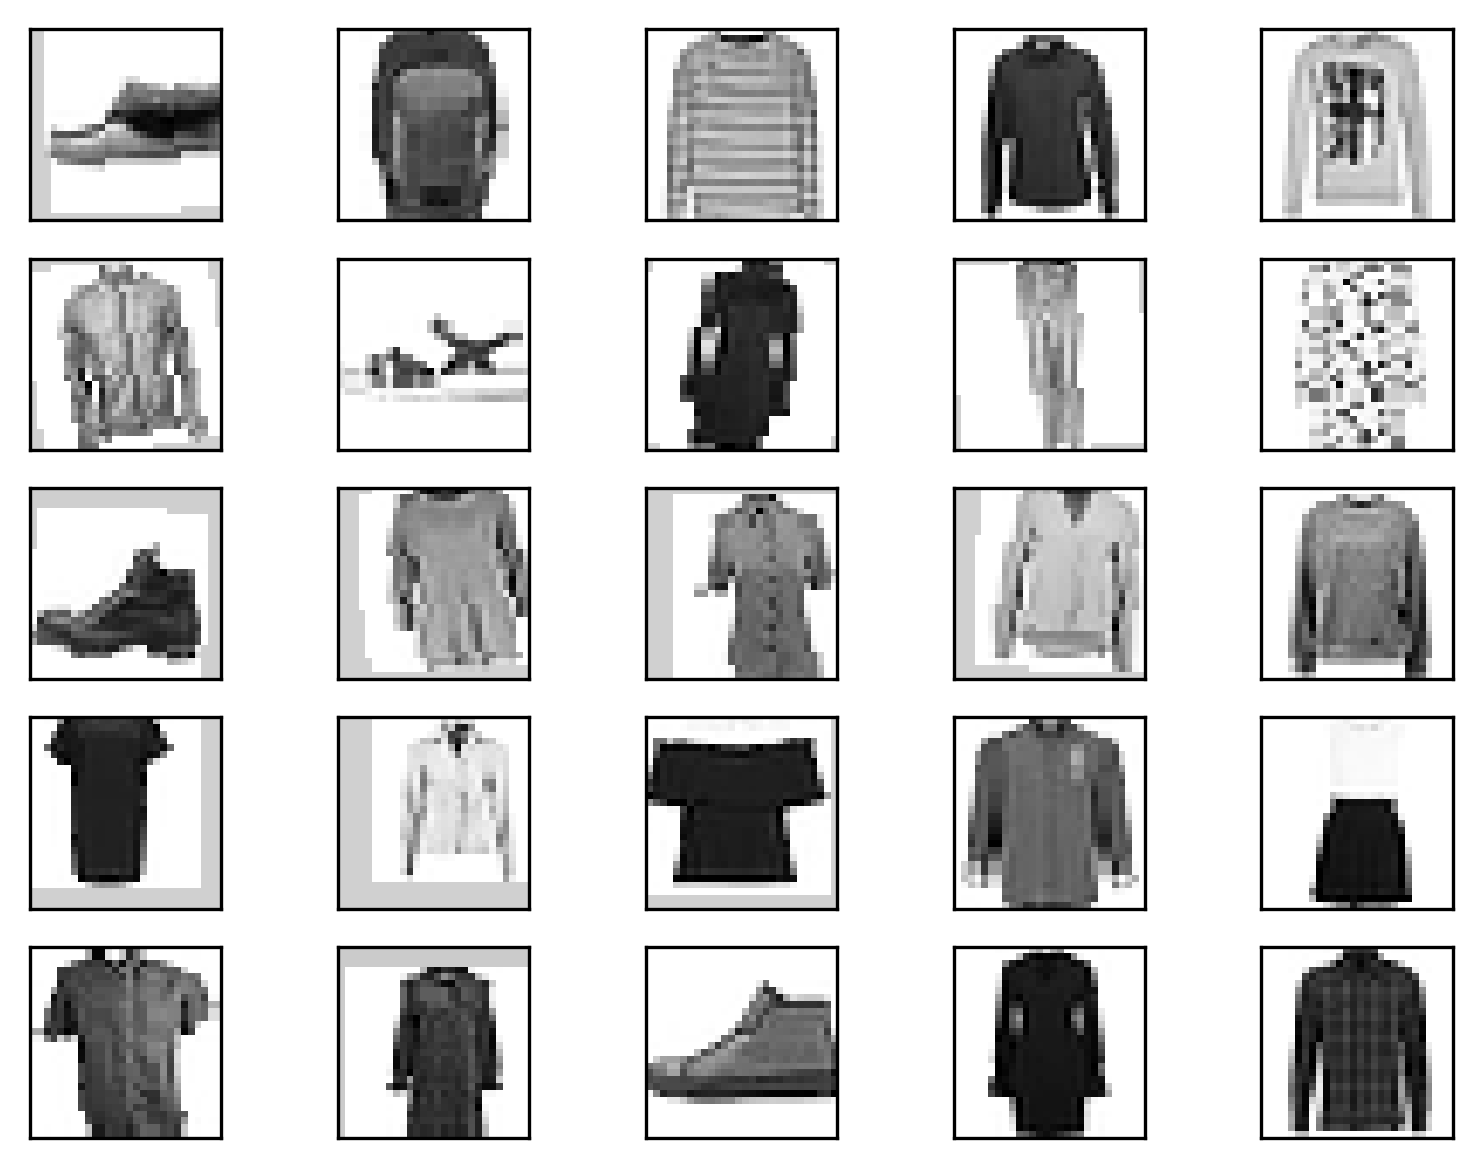

In [33]:
incorrectly_classified = test[pred_labels != test_labels]
n_images = 25
incorrect = np.random.choice(incorrectly_classified.shape[0], n_images, replace=False)


fig, axs = plt.subplots(5, 5)

for ax, img in zip(axs.flatten(), incorrect):
    ax.imshow(incorrectly_classified[img].reshape(28, 28, 1), cmap="Grays")
    ax.set_xticks([])
    ax.set_yticks([])

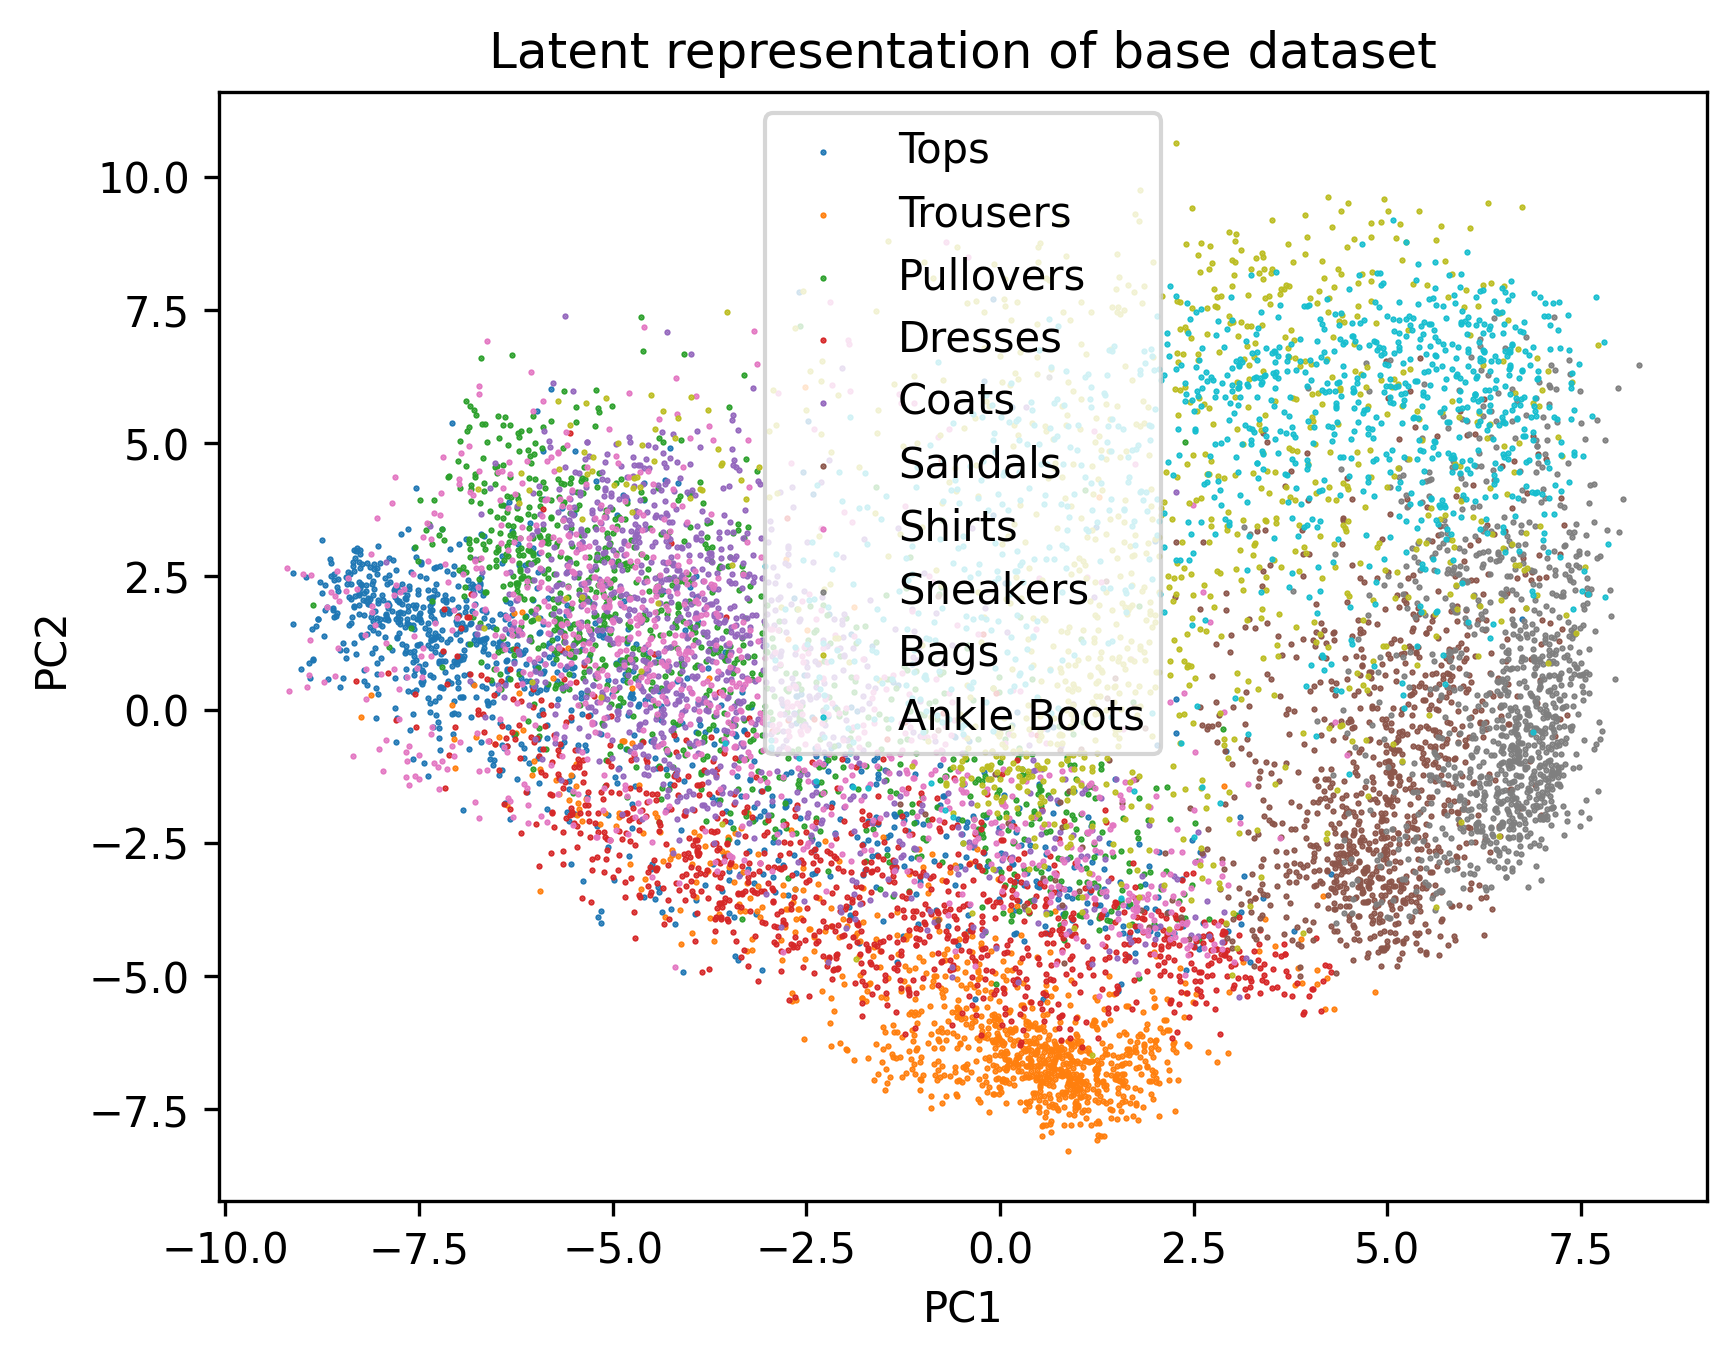

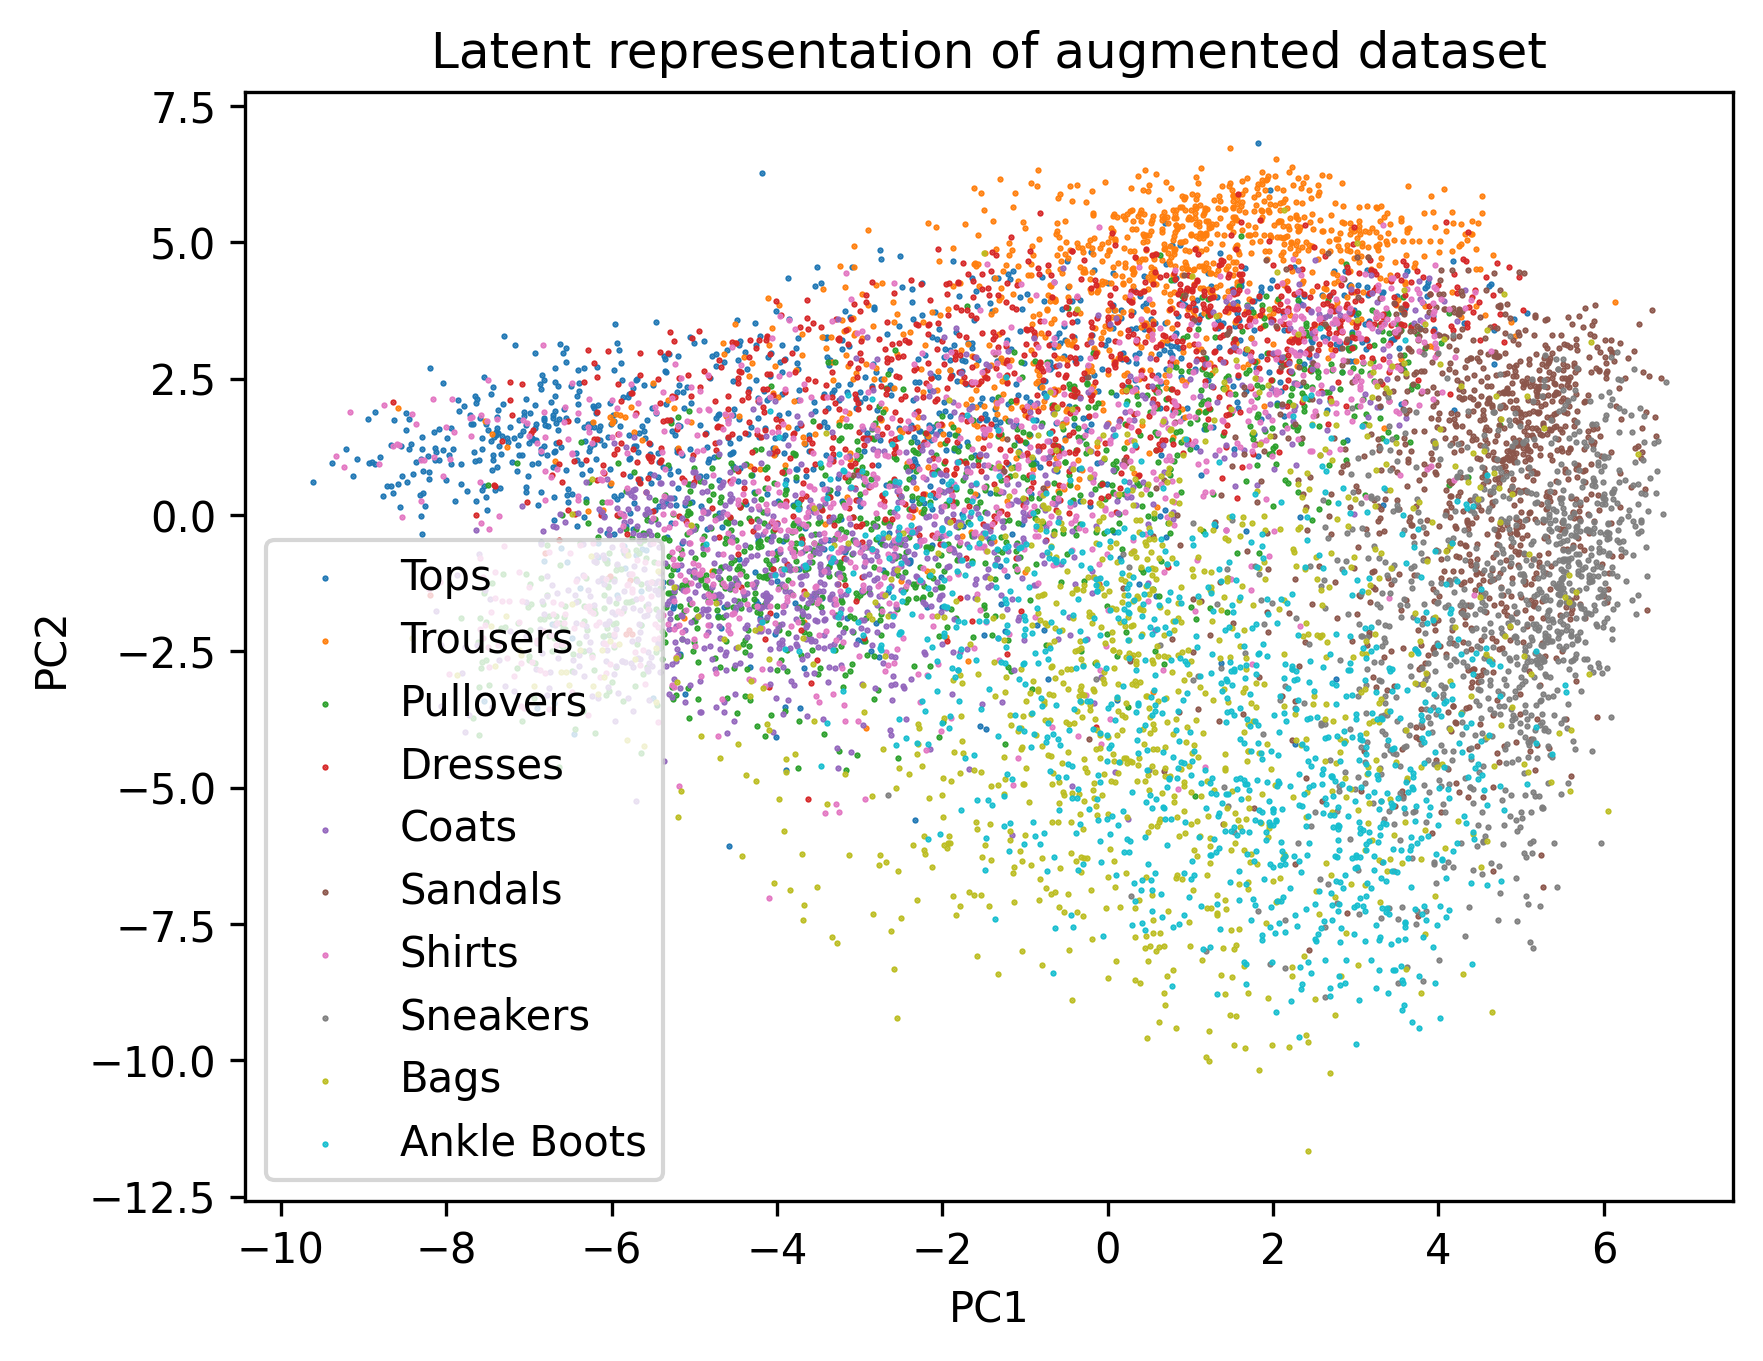

In [9]:
latent_plot(
    cvae, test_base, latent_size=100, title="Latent representation of base dataset"
)
latent_plot(
    cvae,
    test_augment,
    latent_size=100,
    title="Latent representation of augmented dataset",
)

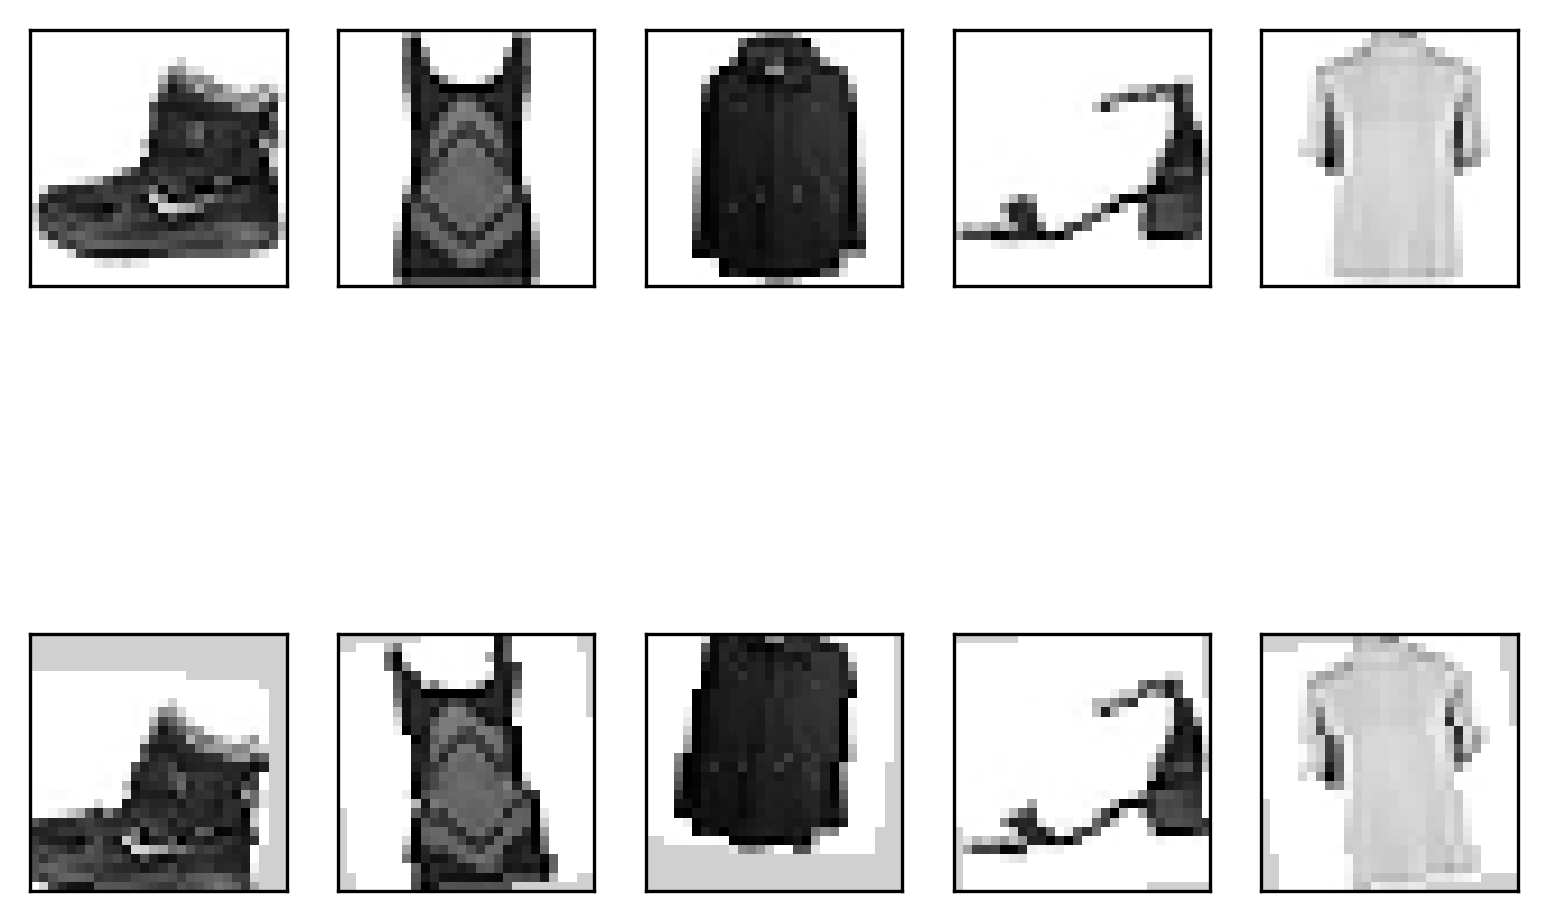

In [11]:
fig, axs = plt.subplots(2, 5)

for base, aug, (base_img, _), (aug_img, _) in zip(
    axs[0], axs[1], train_base, train_augment
):
    base_img = base_img[0].reshape(28, 28, 1)
    aug_img = aug_img[0].reshape(28, 28, 1)
    base.imshow(base_img, cmap="Grays")
    aug.imshow(aug_img, cmap="Grays")
    base.set_xticks([])
    base.set_yticks([])
    aug.set_xticks([])
    aug.set_yticks([])